##                        Churn Modelling Project


This data set contains details of a bank's customers and the target variable
is a binary variable reflecting the fact whether the customer left the bank
  
(closed his account) or he continues to be a customer.

In [ ]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# TO load dataset 
df=pd.read_csv('/content/drive/MyDrive/Palak Deep Learning/Churn_Modelling.csv')

In [ ]:
# To show first 5 record
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

# To show the numbers of rows and columns
df.shape

(10000, 14)

In [ ]:
# To delete unwanted features permanently in dataset
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)


In [ ]:
# TO show the null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

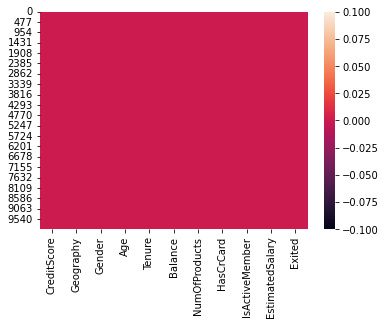

In [ ]:
# To visualize the null value
sns.heatmap(df.isnull())
plt.show()




In [ ]:
# To check the duplicates rows
df.duplicated().sum()

0

In [ ]:
# To show the datatypes
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# create 1st datafram df_cat to hold the categorical data
df_cat=df.select_dtypes(object)

In [ ]:
# creating 2nd dataframe df_num to hold numeric data
df_num=df.select_dtypes(['int64','float64'])

In [ ]:
# converting all the categorical data into numeric data 
# we use labelEncoder to convert the data
from sklearn.preprocessing import LabelEncoder
# create object of Label Encoder
for col in df_cat:
   le=LabelEncoder()
   df_cat[col]=le.fit_transform(df_cat[[col]])

  


In [ ]:
# concatenating of both the dataframe df_cat and df_new and hold into df_new
df_new=pd.concat([df_cat,df_num],axis=1)

In [ ]:
# New dataframe
df_new.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,2,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,2,0,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_new.dtypes

Geography            int64
Gender               int64
CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# first check how many samples in both classes
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Here as we can see the data is not equaly distributed.
we have to devide the data into equally part


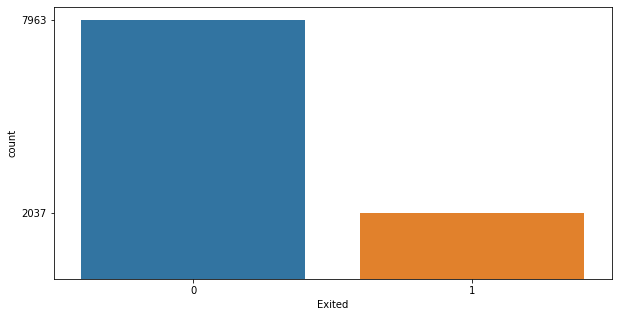

In [ ]:
# Visualization the unbalance data
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Exited')
f = df['Exited'].value_counts()
plt.yticks(f)
plt.show()


In [ ]:
# select input and output 
X=df_new.drop("Exited",axis=1) # input
Y=df_new["Exited"] # output 


In [ ]:
# Train Test split the data
from sklearn.model_selection import train_test_split
X_train ,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
## Apply scaling (Standard Scaler)
from sklearn.preprocessing import StandardScaler
# create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X.shape

(10000, 10)

**Appling ' RandomOverSampler ' to make data equal.**

From the above value_counts of 'Exited' Column and from the Graph
There are about: '7963' out of '2037' 
Which means the Data is not properly distributed
we have to divided the data qually part then,
use RandomOverSampler 
First import RandomOverSampler

In [ ]:
# Apply random over sampling : inbuild class
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Create the object of RandomOverSampler
ros = RandomOverSampler(random_state=1)

In [ ]:
# Before apply RandomOverSampler on training data
Y_train.value_counts()

0    5590
1    1410
Name: Exited, dtype: int64

In [ ]:
# Applied OverSampler on Training data (70%)
X_train_ros,Y_train_ros = ros.fit_resample(X_train,Y_train)

In [ ]:
# Check after apply RandomOverSampler
Y_train_ros.value_counts()

0    5590
1    5590
Name: Exited, dtype: int64

In [ ]:
# Before apply RandomOverSampler on testing data
Y_test.value_counts()

0    2373
1     627
Name: Exited, dtype: int64

In [ ]:
# Also apply RandomOverSampler on tesing data (30%)
X_test_ros,Y_test_ros = ros.fit_resample(X_test,Y_test)

In [ ]:
Y_test_ros.value_counts()

0    2373
1    2373
Name: Exited, dtype: int64

Apply Neural Network


In [ ]:
#First step when we take Neurons only 10,. means  Total Number of Neurons = Total  Numbers of input  
#  create a neural network 
import tensorflow as tf
# create object of sequential class
model=tf.keras.Sequential([
       tf.keras.layers.Dense(units=10,activation='relu',input_shape=(X.shape[1],)),
       # hidden layer 1
       tf.keras.layers.Dense(units=10,activation='relu'), # second hidden layer
       tf.keras.layers.Dense(units=1,activation='sigmoid') # output layer    
])   

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Complie the model 
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
 #Create Early Stopping  means create a call back 
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:

# Train the Model
trained_model = model.fit(X_train_ros,Y_train_ros,batch_size=20,epochs=3500,validation_data=(X_test_ros,Y_test_ros),callbacks=callback)

Epoch 1/3500
559/559 [==============================] - 2s 2ms/step - loss: 0.6072 - accuracy: 0.6727 - val_loss: 0.5555 - val_accuracy: 0.7078
Epoch 2/3500
559/559 [==============================] - 1s 2ms/step - loss: 0.5385 - accuracy: 0.7296 - val_loss: 0.5280 - val_accuracy: 0.7252
Epoch 3/3500
559/559 [==============================] - 2s 4ms/step - loss: 0.5086 - accuracy: 0.7497 - val_loss: 0.5114 - val_accuracy: 0.7368
Epoch 4/3500
559/559 [==============================] - 2s 4ms/step - loss: 0.4914 - accuracy: 0.7589 - val_loss: 0.4980 - val_accuracy: 0.7461
Epoch 5/3500
559/559 [==============================] - 2s 4ms/step - loss: 0.4803 - accuracy: 0.7654 - val_loss: 0.4937 - val_accuracy: 0.7577
Epoch 6/3500
559/559 [==============================] - 2s 4ms/step - loss: 0.4736 - accuracy: 0.7694 - val_loss: 0.4859 - val_accuracy: 0.7651
Epoch 7/3500
559/559 [==============================] - 2s 4ms/step - loss: 0.4683 - accuracy: 0.7742 - val_loss: 0.4841 - val_accuracy:

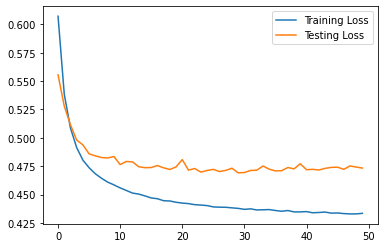

In [ ]:
# Visualisation Training and Testing Loss
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

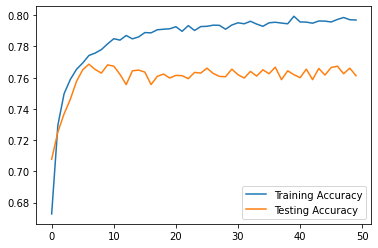

In [ ]:
# Visualise
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
#Here we can see gap between Accuracy and loss, Which shows the model is Overfit


Conclusion

To reduce overfitting we will use Regularization: 
Regularization is a technique to prevent the model from overfitting.
There are two type of technique of Regularization
1.Ridge L2
2.Lasso L1
here we use Ridge L2 Regularization .





In [ ]:
# To create overfitting, use regularation : Ridge means L2
# create a neural network
# Create object of Sequential Class 
# To reduce overfitting , use Regularation : Ridge means L2
# Create a Neural Network

from keras import regularizers
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=10,activation='relu',input_shape=(X.shape[1],),kernel_regularizer=regularizers.l2(0.01)),  # 1st Hidden Layer
        tf.keras.layers.Dense(units=10,activation='relu'),                                                        # 2nd Hidden Layer
        tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))              # Output Layer 
])

In [ ]:
# Compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Train the Model
trained_model = model.fit(X_train_ros,Y_train_ros,batch_size=20,epochs=3500,validation_data=(X_test_ros,Y_test_ros),callbacks=callback)

Epoch 1/3500
559/559 [==============================] - 2s 2ms/step - loss: 0.7193 - accuracy: 0.6258 - val_loss: 0.6384 - val_accuracy: 0.7031
Epoch 2/3500
559/559 [==============================] - 1s 2ms/step - loss: 0.6057 - accuracy: 0.7202 - val_loss: 0.5795 - val_accuracy: 0.7238
Epoch 3/3500
559/559 [==============================] - 1s 2ms/step - loss: 0.5590 - accuracy: 0.7436 - val_loss: 0.5446 - val_accuracy: 0.7503
Epoch 4/3500
559/559 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7514 - val_loss: 0.5300 - val_accuracy: 0.7550
Epoch 5/3500
559/559 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7541 - val_loss: 0.5275 - val_accuracy: 0.7554
Epoch 6/3500
559/559 [==============================] - 1s 2ms/step - loss: 0.5218 - accuracy: 0.7577 - val_loss: 0.5246 - val_accuracy: 0.7564
Epoch 7/3500
559/559 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.7588 - val_loss: 0.5204 - val_accuracy:

In [ ]:
print("Training Loss and Training Accuracy:",model.evaluate(X_train_ros,Y_train_ros))
print("Testing Loss and Testing Accuracy:",model.evaluate(X_train_ros,Y_train_ros))

350/350 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7841
Training Loss and Training Accuracy: [0.4690917432308197, 0.7840787172317505]
350/350 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7841
Testing Loss and Testing Accuracy: [0.4690917432308197, 0.7840787172317505]


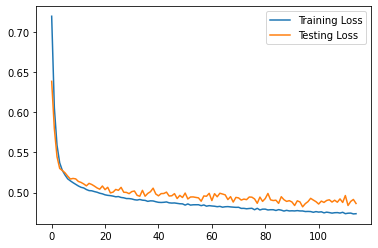

In [ ]:
# Visualisation Training and Testing Loss
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

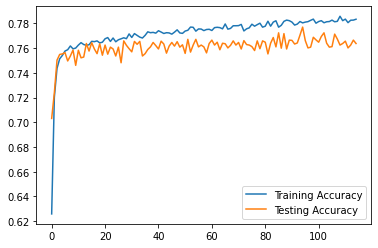

In [ ]:
# Visualise
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

**Conclusion**


Now
After using Regularization we got good accuracy, but we will still try to get more  accuracy.


Then  now we will increase the numbers of neurons and if we increase the number of neurons we will use dropout .
Dropout is a technique that drops  the number of neurons from the neural network or 'ignores' them during training.



Its means dropout handle the huge amount of number of neurons.

Dropout always 20,30,and 50% not more than 50% 

In [ ]:
# Create a Neural Network

from keras import regularizers
from keras.layers import Dropout
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1000,activation='relu',input_shape=(X.shape[1],),kernel_regularizer=regularizers.l2(0.01)),Dropout(0.5),  # 1st Hidden Layer
        tf.keras.layers.Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.5),                            # 2nd Hidden Layer
        tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))                                          # Output Layer 
])

In [ ]:
# Compile the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the Model

trained_model= model.fit(X_train_ros,Y_train_ros,batch_size=32,epochs=3500,
                          validation_data=(X_test_ros,Y_test_ros),callbacks=callback)

Epoch 1/3500
350/350 [==============================] - 7s 18ms/step - loss: 1.2342 - accuracy: 0.7212 - val_loss: 0.6231 - val_accuracy: 0.7379
Epoch 2/3500
350/350 [==============================] - 6s 17ms/step - loss: 0.6222 - accuracy: 0.7426 - val_loss: 0.6146 - val_accuracy: 0.7499
Epoch 3/3500
350/350 [==============================] - 6s 17ms/step - loss: 0.6106 - accuracy: 0.7450 - val_loss: 0.6051 - val_accuracy: 0.7457
Epoch 4/3500
350/350 [==============================] - 6s 16ms/step - loss: 0.6103 - accuracy: 0.7384 - val_loss: 0.6027 - val_accuracy: 0.7391
Epoch 5/3500
350/350 [==============================] - 6s 16ms/step - loss: 0.6069 - accuracy: 0.7429 - val_loss: 0.6088 - val_accuracy: 0.7309
Epoch 6/3500
350/350 [==============================] - 6s 16ms/step - loss: 0.6033 - accuracy: 0.7426 - val_loss: 0.6055 - val_accuracy: 0.7404
Epoch 7/3500
350/350 [==============================] - 6s 17ms/step - loss: 0.6037 - accuracy: 0.7437 - val_loss: 0.5937 - val_ac

In [ ]:
print("Training Loss and Training Accuracy:",model.evaluate(X_train_ros,Y_train_ros))
print("Testing Loss and Testing Accuracy:",model.evaluate(X_train_ros,Y_train_ros))

350/350 [==============================] - 2s 7ms/step - loss: 0.5902 - accuracy: 0.7485
Training Loss and Training Accuracy: [0.5901646018028259, 0.748479425907135]
350/350 [==============================] - 1s 4ms/step - loss: 0.5902 - accuracy: 0.7485
Testing Loss and Testing Accuracy: [0.5901646018028259, 0.748479425907135]


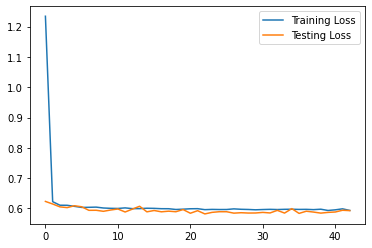

In [ ]:
# Visualisation Training and Testing Loss

plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

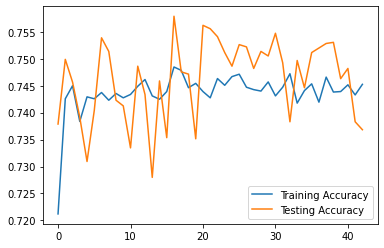

In [ ]:
# Visualisation Training and Testing Accuracy

plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

**Conclusion**




 We can see that,After applying Dropout we got better percentage as what we had applied using Regularization.